<a href="https://colab.research.google.com/github/taranaalex/MLPNS_ATarana/blob/main/linreg_grb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
%pylab inline

# I have created a stylesheet to define default plot behaviors. 
# This stylesheet changes the default parameters stored in the dictionary matplitlib.rcParams
# pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA22_FBianco/master/fbb.mplstyle")
pl.rcParams['font.size'] = 20

Populating the interactive namespace from numpy and matplotlib


In [ ]:
grbAG = pd.read_csv('https://raw.githubusercontent.com/fedhere/MLPNS_FBianco/main/linearRegression/grb050525A.csv')

In [ ]:
grbAG.head()

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0


In [ ]:
grbAG['logtime'] = numpy.log10(grbAG.time)

In [ ]:
grbAG.logtime

0      1.819544
1      1.826075
2      1.832509
3      1.838849
4      1.845098
         ...   
114    4.804398
115    4.873890
116    5.110347
117    5.987380
118    6.068622
Name: logtime, Length: 119, dtype: float64

# Task 1

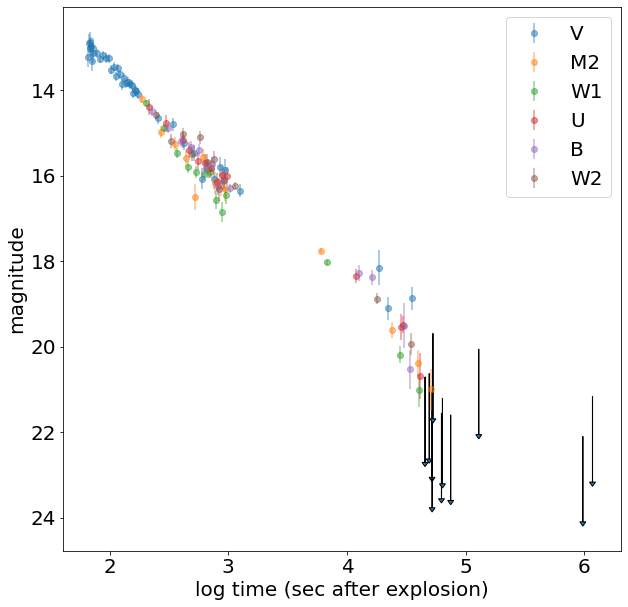

In [ ]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)
    
#loop on every filter to plot - this will give differnt colors naturally. 
#Use pl.errorbar to plot the uncertainties

for f in grbAG["filter"].unique():
    pl.errorbar(grbAG.loc[grbAG['filter'] == f].logtime,
                grbAG[grbAG['filter'] == f].mag, fmt='o',
                yerr=grbAG[grbAG['filter'] == f].magerr, label=f, alpha=0.5)
    

# plot the upperlimits as arrows 
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].logtime, 
             grbAG.loc[i].magerr, 0, 2, 
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.gca().invert_yaxis()
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time (sec after explosion)", fontsize=20);

# Task 2a

In [ ]:
grbAGnu = grbAG[grbAG.upperlimit == 0]
x = grbAGnu.logtime.values
X = np.c_[np.ones((len(grbAGnu), 1)), #creo la "nuova" variabile come matrice Nx2 
          x]

y = grbAGnu.mag

print("shape of the input array X", X.shape)
print("shape of the input array y", y.shape)

shape of the input array X (108, 2)
shape of the input array y (108,)


In [ ]:
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y[::-1])
                                           
print ("best fit parameters from the Normal Equation: " + 
       "intercept {:.2f}, slope {:.2f}".format(*theta_best))

best fit parameters from the Normal Equation: intercept 21.87, slope -2.15


# Task 2b

In [ ]:
#note: imports should be moved to the top cell - follow PEP8 guidelines
from sklearn.linear_model import LinearRegression

#sklearn is an object oriented package. You will call the function which will create a model (model selection) then fit it to the data separately (model fitting)

lr = LinearRegression()
lr.fit(X,y[::-1])
       
#this will create new properties of the model instance: the intercept and coefficients!

print ("best fit parameters from the sklearn LinearRegression(): " + 
       "intercept {:.2f}, slope {:.2f}".format(lr.intercept_, lr.coef_[1]))

best fit parameters from the sklearn LinearRegression(): intercept 21.87, slope -2.15


# Task 2c

In [ ]:
import numpy as np
import scipy as sp

In [ ]:
#note: imports should be moved to the top cell - follow PEP8 guidelines
from scipy.optimize import minimize
def line(x, intercept, slope):
    """
    """
    return x*slope+intercept

def l1(args, x, y):
    """
    """
    a, b = args
    return np.sum(np.abs((y - line(x, a, b))))

initialGuess = (10, 1) #this can be important, a bad choice can get us stuck in a local minimum. But for this simple problem we can just guess whaetever
l1Solution = minimize(l1, initialGuess, args=(x, y))
print(l1Solution)
print("")
print("best fit parameters from the minimization of L1: " +
       "slope {:.2f}, intercept {:.2f}".format(*l1Solution.x))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 26.303317772383874
        x: [ 8.225e+00  2.641e+00]
      nit: 17
      jac: [-1.359e-01 -2.094e+00]
 hess_inv: [[ 1.935e-04 -4.675e-05]
            [-4.675e-05  1.132e-05]]
     nfev: 391
     njev: 125

best fit parameters from the minimization of L1: slope 8.23, intercept 2.64


# Task 2d

In [ ]:
def chi2(args, x, y, s):
    a, b = args
    return sum(np.power(line(x,b,a)-y,2)) #see notes

s = grbAGnu.magerr # assign the uncertainties to s. Its the column names "magerr"

initialGuess = (10, 1)

chi2Solution = minimize(chi2, initialGuess, args=(x, y, s))

print(chi2Solution)
print("")
print("best fit parameters from the minimization of the chi squared: " + 
       "slope {:.2f}, intercept {:.2f}".format(*chi2Solution.x))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 12.825987500725534
        x: [ 2.512e+00  8.583e+00]
      nit: 5
      jac: [-7.153e-07  1.192e-07]
 hess_inv: [[ 7.114e-03 -2.030e-02]
            [-2.030e-02  6.254e-02]]
     nfev: 21
     njev: 7

best fit parameters from the minimization of the chi squared: slope 2.51, intercept 8.58


# Task 3

TypeError: ignored

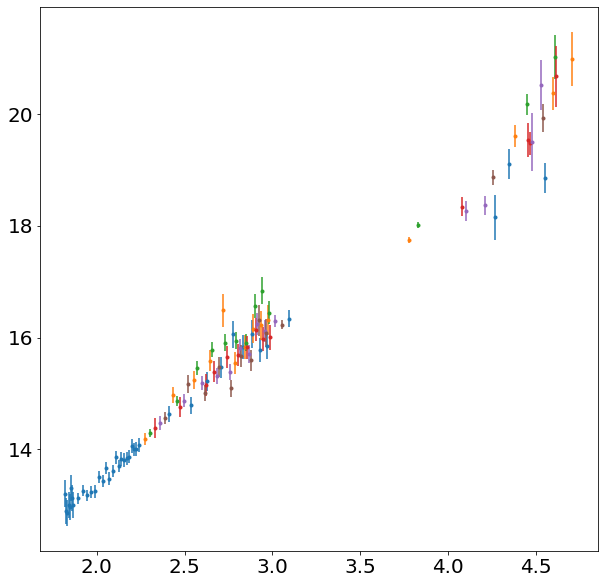

In [ ]:
def plotline(x, intercept, slope, legend=None, symbol='-', ax=ax):
    """
    """
    ax.plot(x,line(x,intercept,slope), ls=symbol, label=legend)

newx = np.array([2,6])

ax = pl.figure(figsize=(10,10)).add_subplot(111)

# plot the datapoints as above as errorbars
for f in grbAGnu['filter'].unique():
  pl.errorbar(grbAGnu.loc[grbAGnu['filter'] == f].logtime,
             grbAGnu[grbAGnu['filter'] == f].mag, fmt='.',
             yerr=grbAGnu[grbAGnu['filter'] == f].magerr, label=f)

# plot the upperlimits as arrows (see above)
for i in grbAG[grbAG.upperlimit == 1].index:
  pl.arrow(grbAG.loc[grbAG['filter'] == f].logtime,
             grbAG[grbAG['filter'] == f].mag, fmt='.',
             yerr=grbAG[grbAG['filter'] == f].magerr, label=f)

#plot the models

#normal equation
plotline(theta_best[0],theta_best[1])
         
#sklearn
plotline(lr.intercept_,lr.coef_)
         
#minimize L1
plotline(l1Solution.x[0],l1Solution.x[1])
         
#minimize chi2
plotline(chi2Solution.x[0],chi2Solution.x[1])

#pl.ylim()
        
#pl.legend()

#with the LinearRegression object I can also do
#pl.plot(grbAG.logtime, lr.predict(np.c_[np.ones((len(grbAG), 1)), grbAG.logtime]), 'k-')

pl.ylim(24.5,11.7)
pl.xlim(1.5, 6.5)
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time (sec after explosion)", fontsize=20);

# Apendice(?)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test, s_train, s_test = train_test_split(x,y,s, test_size=0.25, random_state=42)

In [ ]:
chi2Solution = minimize(chi2, initialGuess, args=(x_train,y_train,s_train))

In [ ]:
print(chi2Solution)
print('')
print('best fit parameters from the minimization of the chi squared: ' +
      'slope {:')

# MonteCarlo Markov chains

In [ ]:
!pip install emcee

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 KB 2.2 MB/s eta 0:00:00


In [ ]:
import emcee

In [ ]:
!pip install corner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import corner

# p(a,b | y) $\propto$ p(y | a,b) * p(a,b)
# log(posterior) $\propto$ log(prior) + log(likelihood)

In [ ]:
def log_prior(theta):
  """
  """
  slope, intercept= theta
  if slope > 0 and intercept > 0:
    return 0
  return -np.inf # lo faccio così che non potrò mai massimizzare la likelihood

def log_likelihood(theta, x, y, yerr):
  slope, intercept = theta
  return -np.sum((line(x, intercept, slope) - y)**2 / yerr**2)


In [ ]:
def log_probability(theta, x, y, yerr):
  """
  """
  lp = log_prior(theta)
  if not np.isfinite(lp):
    return -np.inf
  return lp + log_likelihood(theta, x, y, yerr)

In [ ]:
np.random.seed(324)
ig = [1, 10] #initial guess
nwalkers = 32
ndim = len(ig)
pos = np.array(ig) + np.random.randn(nwalkers, ndim)
pos.shape

(32, 2)

In [ ]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x,y,s))

In [ ]:
sampler.run_mcmc(pos, 5000, progress=True)

  0%|          | 0/5000 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 5000/5000 [01:43<00:00, 48.31it/s]


State([[2.48902242 8.57968936]
 [2.48673586 8.58692387]
 [2.46641786 8.62625828]
 [2.44734502 8.69081399]
 [2.4972184  8.5402413 ]
 [2.46668961 8.63217114]
 [2.4933277  8.5691478 ]
 [2.46870322 8.63262059]
 [2.50548898 8.54283088]
 [2.48526497 8.56904918]
 [2.47579937 8.59491651]
 [2.48615498 8.59520885]
 [2.51765604 8.49336725]
 [2.47138431 8.63839555]
 [2.46228979 8.65107259]
 [2.5042955  8.52465807]
 [2.48658997 8.60201097]
 [2.48594001 8.59167345]
 [2.48139433 8.59686413]
 [2.47918046 8.59466867]
 [2.47414225 8.60367484]
 [2.45412194 8.67106492]
 [2.4668925  8.63882977]
 [2.4551919  8.65337762]
 [2.45345874 8.66604747]
 [2.48295535 8.5940811 ]
 [2.4842163  8.58703853]
 [2.47955562 8.60639865]
 [2.47514864 8.6000089 ]
 [2.49394912 8.56817888]
 [2.48575382 8.59216223]
 [2.46119378 8.64770953]], log_prob=[-317.69494439 -317.65784256 -318.43540996 -320.13885101 -319.06382518
 -317.94107691 -317.97763107 -317.77298302 -319.67784769 -318.93052386
 -318.84781742 -318.22043704 -321.0434412

In [ ]:
samples = sampler.get_chain(discard=200, thin=15, flat=True)

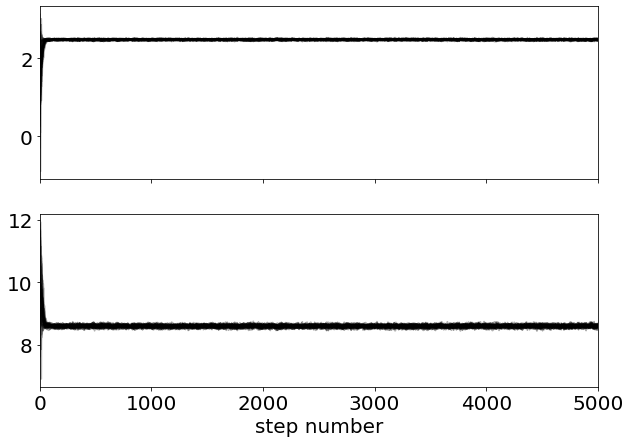

In [ ]:
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], 'k', alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel('step number');

In [ ]:
flat_samples = sampler.get_chain(discard=200, flat=True)

In [ ]:
mcmc = np.zeros((ndim,3 ))
for i in range(ndim):
  mcmc[i] = np.percentile( flat_samples[:,i], [16,50,84])
mcmc

array([[2.46613765, 2.48028531, 2.49461418],
       [8.55971898, 8.5988642 , 8.63818522]])

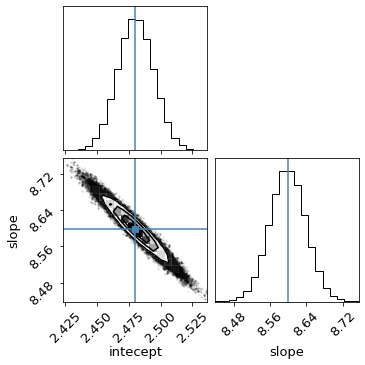

In [ ]:
import corner
pl.rcParams['font.size']= 13
fig = corner.corner(
    flat_samples, labels=['intecept', 'slope'], truths=mcmc[:,1]);